# Notebook Context

## Question:
<font size="5">
What is the best crop size to use during training to reach for the best tradeoff between training speed and model performance?
</font>

## Answer:
<font size="5">
After analyzing both the liver segmentation models and the lesion segmentation models on the basis of all metrics considered, the conclusion is that the best crop size to use for training is the 256x256 one in order to have competitive results and a reasonably low training time for your model.  
</font>


In [1]:
import os
import numpy as np
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt
from pprint import pprint

In [2]:
def load_experiment_config(experiment_config_path):
    experiment_config = pkl.load(open(experiment_config_path, "rb"))
    pprint(experiment_config)
    return experiment_config

In [3]:
def load_experiment_data(experiment_data_path):
    experiment_history = pd.read_csv(experiment_data_path, header=0)
    pprint(experiment_history.columns)
    return experiment_history    

# Liver Segmentation Performance

## Single experiment

In [4]:
def plot_train_val_metrics(experiment_config, experiment_data, train_metric_names, val_metric_names):
    
    best_metrics = {}
    plt.figure(figsize=(10, 7))
    
    for train_metric_name, val_metric_name in zip(train_metric_names, val_metric_names):
        plt.plot(experiment_data[train_metric_name], label=train_metric_name)
        plt.plot(experiment_data[val_metric_name], label=val_metric_name)
        best_metrics[train_metric_name] = np.round(experiment_data[train_metric_name].max(), 4)
        best_metrics[val_metric_name] = np.round(experiment_data[val_metric_name].max(), 4)

    plt.title(f"Model trained on random crop size: {experiment_config['training_config']['crop_size']}")
    plt.xlabel("Training Epochs")
    plt.ylabel("Metric Mangitude")
    plt.legend()

In [5]:
EXPERIMENTS_ROOT_PATH = "../experiments_data/liver/experiment_3/"
EXPERIMENT_CONFIG_NAME = "experiment_config.pkl"
EXPERIMENT_HISTORY_NAME = "experiment_history.csv"

# Load experiment config
liver_experiment_config_1 = load_experiment_config(os.path.join(EXPERIMENTS_ROOT_PATH, EXPERIMENT_CONFIG_NAME))

# Load experiment_history
liver_experiment_history_1 = load_experiment_data(os.path.join(EXPERIMENTS_ROOT_PATH, EXPERIMENT_HISTORY_NAME))

{'device': 'cuda',
 'model_config': {'backbone': 'base',
                  'block_type': 'base',
                  'channels': 1,
                  'dilation': [1, 1, 1, 1, 1],
                  'dilation_up': [1, 1, 1, 1, 1],
                  'dropout': 0,
                  'filter_sizes': [20, 40, 80, 160, 320, 640],
                  'filter_sizes_up': [20, 40, 80, 160, 320, 640],
                  'filter_start': 20,
                  'filter_start_up': 20,
                  'init_type': 'he_n',
                  'model_name': 'vUnet2D',
                  'se_reduction': 0,
                  'structure': [3, 3, 3, 3, 3],
                  'structure_up': [3, 3, 3, 3, 3],
                  'up_conv_type': [4, 2, 1],
                  'use_auxiliary_inputs': False,
                  'use_batchnorm': True,
                  'use_conv_pool': True,
                  'use_pypool': False},
 'training_config': {'Training_ROI_Vicinity': 4,
                     'augment': ['rot', 'zoom', 'h

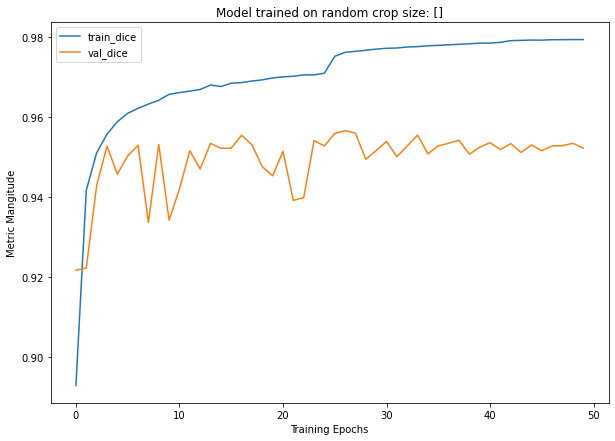

In [6]:
plot_train_val_metrics(
    experiment_config=liver_experiment_config_1,
    experiment_data = liver_experiment_history_1,
    train_metric_names=["train_dice"],
    val_metric_names=["val_dice"]
)

## Cross Experiments

In [7]:
def plot_cross_experiments_metrics(experiment_configs, experiments_data, metric_names):
    
    plt.figure(figsize=(10, 7))
    
    for metric_name in metric_names:
        for config, experiment in zip(experiment_configs, experiments_data):
            plt.plot(experiment[metric_name], label=f"{metric_name} - {config['training_config']['crop_size'] if config['training_config']['crop_size'] != [] else '[512, 512]'}")
           
    plt.title(f"Cross-Model Comparison with different training sample crop size")
    plt.xlabel("Training Epochs")
    plt.ylabel("Metric Mangitude")
    plt.legend()

In [10]:
EXPERIMENTS_ROOT_PATH = "../experiments_data/liver/experiment_1/"
EXPERIMENT_CONFIG_NAME = "experiment_config.pkl"
EXPERIMENT_HISTORY_NAME = "experiment_history.csv"

# Load experiment config
liver_experiment_config_2 = load_experiment_config(os.path.join(EXPERIMENTS_ROOT_PATH, EXPERIMENT_CONFIG_NAME))

# Load experiment_history
liver_experiment_history_2 = load_experiment_data(os.path.join(EXPERIMENTS_ROOT_PATH, EXPERIMENT_HISTORY_NAME))

{'model_config': {'backbone': 'base',
                  'block_type': 'base',
                  'channels': 1,
                  'dilation': [1, 1, 1, 1, 1],
                  'dilation_up': [1, 1, 1, 1, 1],
                  'dropout': 0,
                  'filter_sizes': [20, 40, 80, 160, 320, 640],
                  'filter_sizes_up': [20, 40, 80, 160, 320, 640],
                  'filter_start': 20,
                  'filter_start_up': 20,
                  'init_type': 'he_n',
                  'model_name': 'vUnet2D',
                  'se_reduction': 0,
                  'structure': [3, 3, 3, 3, 3],
                  'structure_up': [3, 3, 3, 3, 3],
                  'up_conv_type': [4, 2, 1],
                  'use_auxiliary_inputs': False,
                  'use_batchnorm': True,
                  'use_conv_pool': True,
                  'use_pypool': False},
 'training_config': {'Training_ROI_Vicinity': 4,
                     'augment': ['rot', 'zoom', 'hflip', 'vflip'],
  

In [8]:
EXPERIMENTS_ROOT_PATH = "../experiments_data/liver/experiment_2/"
EXPERIMENT_CONFIG_NAME = "experiment_config.pkl"
EXPERIMENT_HISTORY_NAME = "experiment_history.csv"

# Load experiment config
liver_experiment_config_3 = load_experiment_config(os.path.join(EXPERIMENTS_ROOT_PATH, EXPERIMENT_CONFIG_NAME))

# Load experiment_history
liver_experiment_history_3 = load_experiment_data(os.path.join(EXPERIMENTS_ROOT_PATH, EXPERIMENT_HISTORY_NAME))

{'device': 'cuda',
 'model_config': {'backbone': 'base',
                  'block_type': 'base',
                  'channels': 1,
                  'dilation': [1, 1, 1, 1, 1],
                  'dilation_up': [1, 1, 1, 1, 1],
                  'dropout': 0,
                  'filter_sizes': [20, 40, 80, 160, 320, 640],
                  'filter_sizes_up': [20, 40, 80, 160, 320, 640],
                  'filter_start': 20,
                  'filter_start_up': 20,
                  'init_type': 'he_n',
                  'model_name': 'vUnet2D',
                  'se_reduction': 0,
                  'structure': [3, 3, 3, 3, 3],
                  'structure_up': [3, 3, 3, 3, 3],
                  'up_conv_type': [4, 2, 1],
                  'use_auxiliary_inputs': False,
                  'use_batchnorm': True,
                  'use_conv_pool': True,
                  'use_pypool': False},
 'training_config': {'Training_ROI_Vicinity': 4,
                     'augment': ['rot', 'zoom', 'h

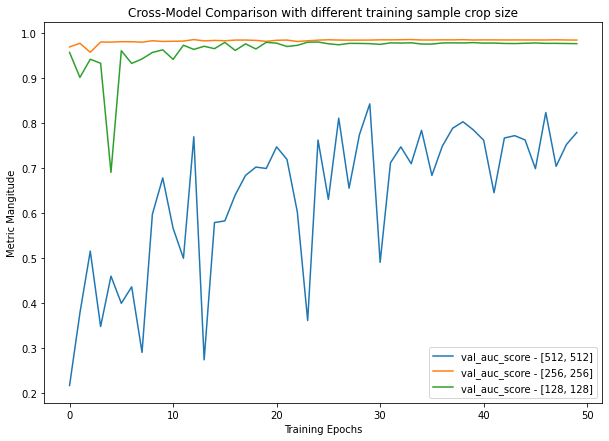

In [29]:
plot_cross_experiments_metrics(
    experiment_configs=[liver_experiment_config_1, liver_experiment_config_2, liver_experiment_config_3],
    experiments_data=[liver_experiment_history_1, liver_experiment_history_2, liver_experiment_history_3],
    metric_names=["val_auc_score"]
    )

### Results analysis per metric:

#### 1. Dice Score
<font size="4">
    When comparing the 3 trained models with respect to the dice score computed on the validation set, the model trained with samples randomly cropped at size 256x256 is the most performant. However, when looking at the training dice score, the best performing model is the one trained on full size samples. To conclude, from the perspective of the dice score, the most efficient would be to train on the model on crop sizes of 256x256 because this will allow for faster training.
</font>

#### 2. IoU Score
<font size="4">
    When comparing the 3 trained models with respect to the IoU score computed on the validation set, the model trained with samples randomly cropped at size 256x256 is the most performant. However, when looking at the training IoU score, the best performing model is the one trained on full size samples. To conclude, from the perspective of the IoU score, the most efficient would be to train on the model on crop sizes of 256x256 because this will allow for faster training.
</font>

#### 3. Accuracy - What proportion of the total predictions is actually correct?
<font size="4">
    Best performing model in terms of accuracy computed on the validation split is the one trained with samples randomly cropped at size 256x256. However, when looking at the best performing model in terms of accuracy computed on the training split, the best performing one is the one trained on the full size samples. To conclude, from the perspective of the accuracy, the most efficient would be to train on the model on crop sizes of 256x256 because this will allow for faster training.
</font>

#### 4. Precision - What proportion of the positive predictions is actually correct?
<font size="4">
    Best performing model in terms of precision computed on the validation split is the one trained on the full size samples. The same is true when looking at the precision computed on the training set. To conclude, from the perspective of the precision, the most efficient would be to train the model on the full size samples.
</font>

#### 5. Recall(Sensitivity) - What proportion of the actual true positives is identified correctly?
<font size="4">
    The best performing model in terms of recall computed for both the training and the validation set is the one trained on the samples cropped at size 256x256.
</font>

#### 6. Specificity - What proportion of the actual true negatives was is identified correctly?
<font size="4">
    The best performing model in terms of specificity computed on the training set is the one trained on the full size samples. When comparing different models with respect to this metric on the validation set, the model trained on the full size samples and the model trained on cropped samples of size 256x256 seem to reach a similar performance.
</font>

#### 7. AuC - What is the probability that the model will rank a random positive example higher than a random negative example?
<font size="4">
    
</font>

# Lesion Segmentation Performance

## Single Experiment

In [16]:
EXPERIMENTS_ROOT_PATH = "../experiments_data/lesion/experiment_1/"
EXPERIMENT_CONFIG_NAME = "experiment_config.pkl"
EXPERIMENT_HISTORY_NAME = "experiment_history.csv"

# Load experiment config
lesion_experiment_config_1 = load_experiment_config(os.path.join(EXPERIMENTS_ROOT_PATH, EXPERIMENT_CONFIG_NAME))

# Load experiment_history
lesion_experiment_history_1 = load_experiment_data(os.path.join(EXPERIMENTS_ROOT_PATH, EXPERIMENT_HISTORY_NAME))

{'device': 'cuda',
 'model_config': {'backbone': 'base',
                  'block_type': 'base',
                  'channels': 1,
                  'dilation': [1, 1, 1, 1, 1],
                  'dilation_up': [1, 1, 1, 1, 1],
                  'dropout': 0,
                  'filter_sizes': [20, 40, 80, 160, 320, 640],
                  'filter_sizes_up': [20, 40, 80, 160, 320, 640],
                  'filter_start': 20,
                  'filter_start_up': 20,
                  'init_type': 'he_n',
                  'model_name': 'vUnet2D',
                  'se_reduction': 0,
                  'structure': [3, 3, 3, 3, 3],
                  'structure_up': [3, 3, 3, 3, 3],
                  'up_conv_type': [4, 2, 1],
                  'use_auxiliary_inputs': False,
                  'use_batchnorm': True,
                  'use_conv_pool': True,
                  'use_pypool': False},
 'training_config': {'Training_ROI_Vicinity': 4,
                     'augment': ['rot', 'zoom', 'h

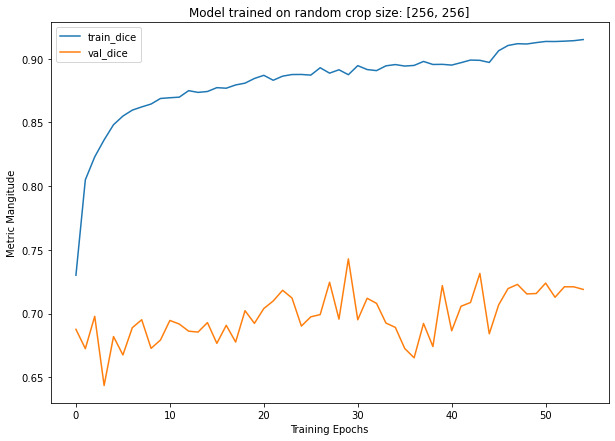

In [17]:
plot_train_val_metrics(
    experiment_config=lesion_experiment_config_1,
    experiment_data = lesion_experiment_history_1,
    train_metric_names=["train_dice"],
    val_metric_names=["val_dice"]
)

## Cross Experiments

In [18]:
EXPERIMENTS_ROOT_PATH = "../experiments_data/lesion/experiment_2/"
EXPERIMENT_CONFIG_NAME = "experiment_config.pkl"
EXPERIMENT_HISTORY_NAME = "experiment_history.csv"

# Load experiment config
lesion_experiment_config_2 = load_experiment_config(os.path.join(EXPERIMENTS_ROOT_PATH, EXPERIMENT_CONFIG_NAME))

# Load experiment_history
lesion_experiment_history_2 = load_experiment_data(os.path.join(EXPERIMENTS_ROOT_PATH, EXPERIMENT_HISTORY_NAME))

{'device': 'cuda',
 'model_config': {'backbone': 'base',
                  'block_type': 'base',
                  'channels': 1,
                  'dilation': [1, 1, 1, 1, 1],
                  'dilation_up': [1, 1, 1, 1, 1],
                  'dropout': 0,
                  'filter_sizes': [20, 40, 80, 160, 320, 640],
                  'filter_sizes_up': [20, 40, 80, 160, 320, 640],
                  'filter_start': 20,
                  'filter_start_up': 20,
                  'init_type': 'he_n',
                  'model_name': 'vUnet2D',
                  'se_reduction': 0,
                  'structure': [3, 3, 3, 3, 3],
                  'structure_up': [3, 3, 3, 3, 3],
                  'up_conv_type': [4, 2, 1],
                  'use_auxiliary_inputs': False,
                  'use_batchnorm': True,
                  'use_conv_pool': True,
                  'use_pypool': False},
 'training_config': {'Training_ROI_Vicinity': 4,
                     'augment': ['rot', 'zoom', 'h

In [20]:
EXPERIMENTS_ROOT_PATH = "../experiments_data/lesion/experiment_3/"
EXPERIMENT_CONFIG_NAME = "experiment_config.pkl"
EXPERIMENT_HISTORY_NAME = "experiment_history.csv"

# Load experiment config
lesion_experiment_config_3 = load_experiment_config(os.path.join(EXPERIMENTS_ROOT_PATH, EXPERIMENT_CONFIG_NAME))

# Load experiment_history
lesion_experiment_history_3 = load_experiment_data(os.path.join(EXPERIMENTS_ROOT_PATH, EXPERIMENT_HISTORY_NAME))

{'device': 'cuda',
 'model_config': {'backbone': 'base',
                  'block_type': 'base',
                  'channels': 1,
                  'dilation': [1, 1, 1, 1, 1],
                  'dilation_up': [1, 1, 1, 1, 1],
                  'dropout': 0,
                  'filter_sizes': [20, 40, 80, 160, 320, 640],
                  'filter_sizes_up': [20, 40, 80, 160, 320, 640],
                  'filter_start': 20,
                  'filter_start_up': 20,
                  'init_type': 'he_n',
                  'model_name': 'vUnet2D',
                  'se_reduction': 0,
                  'structure': [3, 3, 3, 3, 3],
                  'structure_up': [3, 3, 3, 3, 3],
                  'up_conv_type': [4, 2, 1],
                  'use_auxiliary_inputs': False,
                  'use_batchnorm': True,
                  'use_conv_pool': True,
                  'use_pypool': False},
 'training_config': {'Training_ROI_Vicinity': 4,
                     'augment': ['rot', 'zoom', 'h

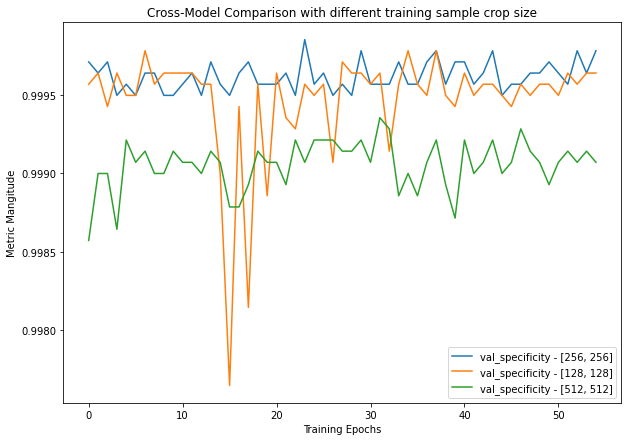

In [41]:
plot_cross_experiments_metrics(
    experiment_configs=[lesion_experiment_config_1, lesion_experiment_config_2, lesion_experiment_config_3],
    experiments_data=[lesion_experiment_history_1, lesion_experiment_history_2, lesion_experiment_history_3],
    metric_names=["val_specificity"]
    )

### Results analysis per metric:

#### 1. Dice Score
<font size="4">
    When comparing the 3 trained models with respect to the dice score computed on the validation set, the model trained with samples randomly cropped at size 256x256 is the most performant. Same is true for the model trained on full size samples. To conclude, from the perspective of the dice score, the most efficient would be to train on the model on crop sizes of 256x256 because this will allow for faster training.
</font>

#### 2. IoU Score
<font size="4">
    When comparing the 3 trained models with respect to the IoU score computed on the validation set, the model trained with samples randomly cropped at size 256x256 is the most performant. The same is true for the model trained on full size samples. To conclude, from the perspective of the IoU score, the most efficient would be to train on the model on crop sizes of 256x256 because this will allow for faster training.
</font>

#### 3. Accuracy - What proportion of the total predictions is actually correct?
<font size="4">
    Best performing model in terms of accuracy computed on the validation split is the one trained with samples randomly cropped at size 256x256. However, when looking at the best performing model in terms of accuracy computed on the training split, the best performing one is the one trained on the full size samples. To conclude, from the perspective of the accuracy, the most efficient would be to train on the model on crop sizes of 256x256 because this will allow for faster training.
</font>

#### 4. Precision - What proportion of the positive predictions is actually correct?
<font size="4">
    Best performing model in terms of precision computed on the validation split is the one trained on the randomly cropped 256x256 samples. However, when comparing the precision on the training split, the model trained on full size samples is similar in performance to the model trained on the 256x256 cropped samples. To conclude, from the perspective of the precision, the most efficient would be to train the model on the 256x256 randomly cropped samples.
</font>

#### 5. Recall(Sensitivity) - What proportion of the actual true positives is identified correctly?
<font size="4">
    The best performing model in terms of recall computed for both the training and the validation set is the one trained on the samples cropped at size 256x256.
</font>

#### 6. Specificity - What proportion of the actual true negatives was is identified correctly?
<font size="4">
    The best performing model in terms of recall computed for both the training and the validation set is the one trained on the samples cropped at size 256x256.
</font>

#### 7. AuC - What is the probability that the model will rank a random positive example higher than a random negative example?
<font size="4">
    
</font>